In [1]:
# importing libraries
from dateutil import parser
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import NullFormatter
from matplotlib.dates import MonthLocator, DateFormatter

In [2]:
file = "weather.csv"

# reading csv file
df = pd.read_csv(file)

row_no = 1
columns = df.columns.values

# frequency = day. It can be hour(h), week(w) and month(m)
frq = "d"

df.head()

,obstime,temprature,pressure,wind_speed,wind_direction,relative_humidity
0,04/01/2017 00:01,-17.2,976.7,7.7,7,72.2
1,04/01/2017 00:02,-17.1,976.6,8.6,15,72.2
2,04/01/2017 00:03,-17.1,976.6,9.5,19,72.1
3,04/01/2017 00:04,-17.2,976.6,8.6,18,72.1
4,04/01/2017 00:05,-17.2,976.6,7.7,15,72.1


In [3]:
# Parsing date 
df['obstime'] = df['obstime'].apply(parser.parse)

# sorting data and dropping duplicate values
df.sort_values("obstime", inplace=True)
df.drop_duplicates(keep=False, inplace=True)

# setting index on obstime
df = df.set_index(df['obstime'])

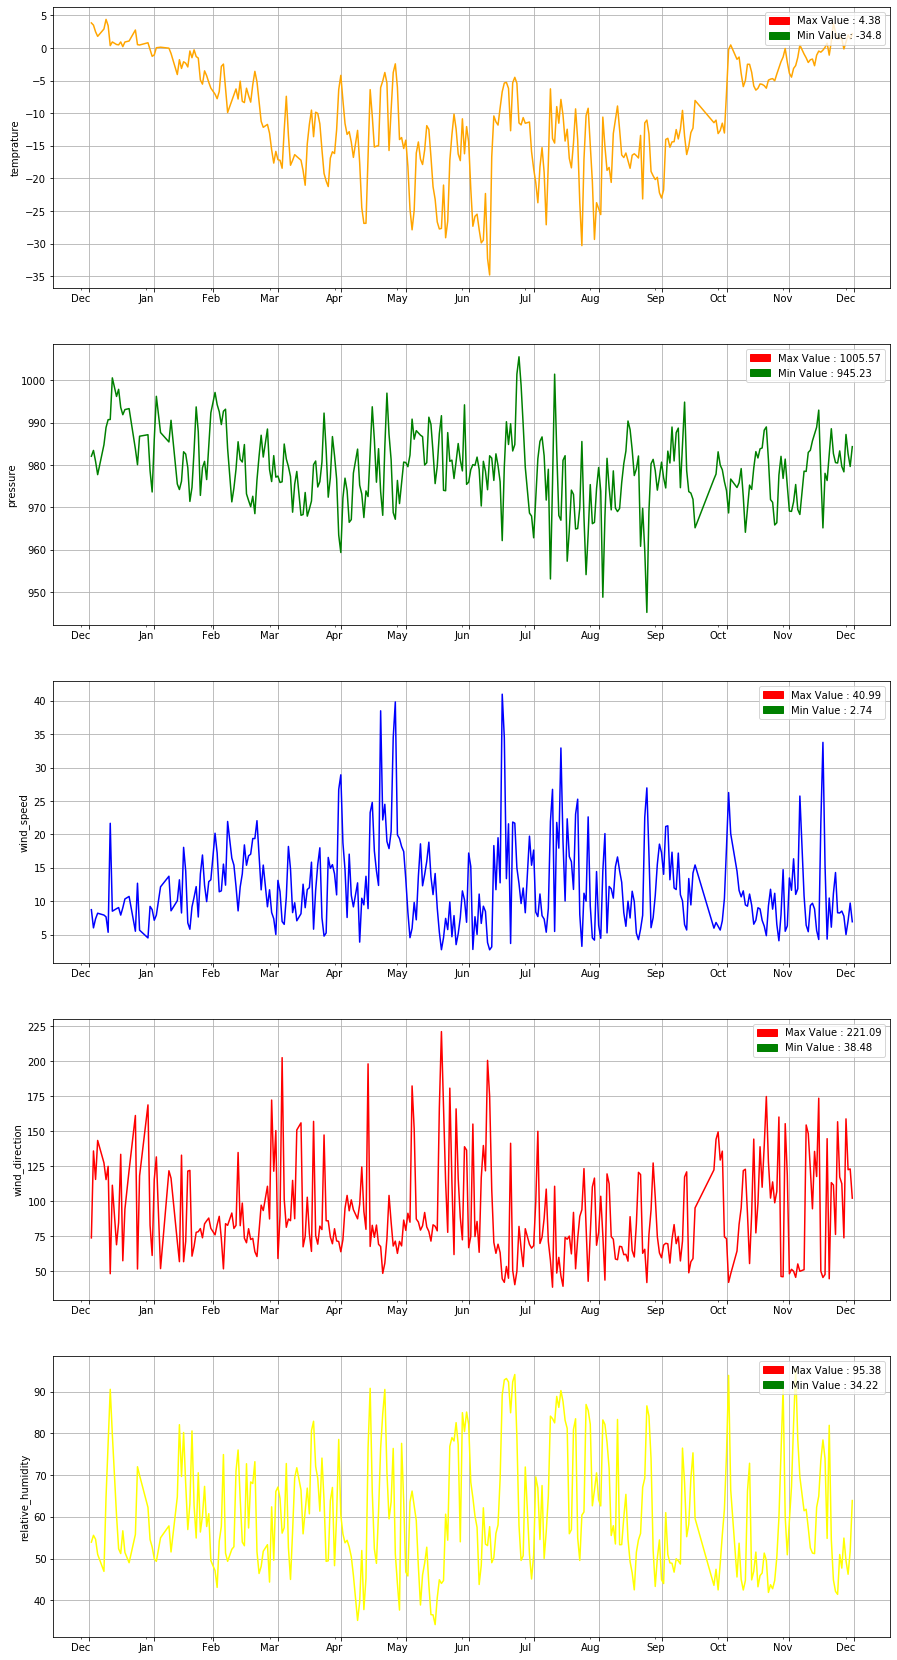

In [4]:
plt.figure(figsize=(15, 30))

# going over each data column
for column in columns[1:]:
    data = df[column]

    # removing incorrect data i.e. -999 and assigning color for different data
    if column == "temprature":
        data = data[data > -273]
        color = "orange"
    else:
        data = data[data > 0]
        if column == "wind_speed":
            color = "blue"
        elif column == "wind_direction":
            color = "red"
        elif column == "pressure":
            color = "green"
        elif column == "relative_humidity":
            color = "yellow"
    
    # group by freq. In this case days.
    data = data.groupby(pd.Grouper(freq=frq)).mean().dropna()

    if not data.empty:
        # getting maximum and minimum of the data
        maxm = str(round(max(data), 2))
        minm = str(round(min(data), 2))

        # assigning graph position
        ax1 = plt.subplot(5, 1, row_no)

        # plotting graph
        plt.plot(data, color=color)
        plt.grid(True)

        ax1.xaxis.set_major_locator(MonthLocator())
        ax1.xaxis.set_minor_locator(MonthLocator(bymonthday=28))
        ax1.xaxis.set_major_formatter(NullFormatter())
        ax1.xaxis.set_minor_formatter(DateFormatter('%b'))
        
        # putting legends
        plt.ylabel(column)
       
        # adding max and min into legends
        max_patch = mpatches.Patch(color='red')
        min_patch = mpatches.Patch(color='green')

        plt.legend(loc=1, handles=[max_patch, min_patch], labels=['Max Value : ' + maxm, 'Min Value : ' + minm])
        
        # increasing varibale value to plot another graph in plot.
        row_no += 1

plt.show()

---
##### References
data - http://data.ncaor.gov.in/newhtml
